# Reference and Citations

Dataset URL:
https://nihcc.app.box.com/v/ChestXray-NIHCC

Acknowledgements:
NIH Clinical Center for the dataset

Citation:
Wang X, Peng Y, Lu L, Lu Z, Bagheri M, Summers RM. ChestX-ray8: Hospital-scale Chest X-ray Database and Benchmarks on Weakly-Supervised Classification and Localization of Common Thorax Diseases. IEEE CVPR 2017, http://openaccess.thecvf.com/content_cvpr_2017/papers/Wang_ChestX-ray8_Hospital-Scale_Chest_CVPR_2017_paper.pdf

Tutorial: Enhancing Medical Multi-Label Image Classification Using PyTorch & Lightning

By: Vaibhav Singh

July 11, 2023

URL:  https://learnopencv.com/medical-multi-label/

# Set Test Mode

In [1]:
# Set mode (Test or Not)
test = False

# Building the labels, train, validation, and test dataframe

In [2]:
# libraries
import pandas as pd
from itertools import chain
from collections import Counter

In [3]:
data_df = pd.read_csv('./data/Data_Entry_2017_v2020.csv')
data_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168
...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,38,M,PA,2048,2500,0.168,0.168
112116,00030802_000.png,No Finding,0,30802,28,M,PA,2048,2500,0.168,0.168
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168
112118,00030804_000.png,No Finding,0,30804,29,F,PA,2048,2500,0.168,0.168


In [4]:
# retain only needed columns
cols_to_retain = ['Image Index',
                  'Finding Labels',]
data_df = data_df[cols_to_retain]
data_df.head()

,Image Index,Finding Labels
0,00000001_000.png,Cardiomegaly
1,00000001_001.png,Cardiomegaly|Emphysema
2,00000001_002.png,Cardiomegaly|Effusion
3,00000002_000.png,No Finding
4,00000003_001.png,Hernia


In [5]:
# Sample to speed up training (Test Only)
if test:
    sampled_df = data_df.sample(frac=0.2, random_state=42) # 20% sample
    data_df = sampled_df
    data_df.to_csv('./data/sampled_labels.csv', index=False)
else:
    data_df.to_csv('./data/labels.csv')

In [6]:
# Create binary columns for the findings for stratification
from sklearn.preprocessing import MultiLabelBinarizer

# create temporary dataframe
df = data_df.copy()

# Create column with list of labels
df['labels'] = df['Finding Labels'].str.split('|')

# One-hot encode the labels
mlb = MultiLabelBinarizer()
one_hot_labels = pd.DataFrame(mlb.fit_transform(df['labels']), columns=mlb.classes_)

one_hot_labels.head()

# Reset index to avoid mismatch and concatenate the one-hot encoded labels
df = pd.concat([df.reset_index(drop=True), one_hot_labels], axis=1)
df.head()

,Image Index,Finding Labels,labels,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,[Cardiomegaly],0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,"[Cardiomegaly, Emphysema]",0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,"[Cardiomegaly, Effusion]",0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,No Finding,[No Finding],0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,00000003_001.png,Hernia,[Hernia],0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [7]:
# Use labels as stratification columns
labels_list = ['Atelectasis', 
               'Cardiomegaly', 
               'Consolidation', 
               'Edema',
               'Effusion', 
               'Emphysema', 
               'Fibrosis', 
               'Hernia', 
               'Infiltration',
               'Mass', 
               'No Finding', 
               'Nodule', 
               'Pleural_Thickening', 
               'Pneumonia',
               'Pneumothorax']
df['stratify_col'] = df[labels_list].astype(str).agg(''.join, axis=1)
df

,Image Index,Finding Labels,labels,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,stratify_col
0,00000001_000.png,Cardiomegaly,[Cardiomegaly],0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,010000000000000
1,00000001_001.png,Cardiomegaly|Emphysema,"[Cardiomegaly, Emphysema]",0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,010001000000000
2,00000001_002.png,Cardiomegaly|Effusion,"[Cardiomegaly, Effusion]",0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,010010000000000
3,00000002_000.png,No Finding,[No Finding],0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,000000000010000
4,00000003_001.png,Hernia,[Hernia],0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,000000010000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,"[Mass, Pneumonia]",0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,000000000100010
112116,00030802_000.png,No Finding,[No Finding],0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,000000000010000
112117,00030803_000.png,No Finding,[No Finding],0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,000000000010000
112118,00030804_000.png,No Finding,[No Finding],0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,000000000010000


In [8]:
# Remove strata with less than 30 observations
strata_counts = df['stratify_col'].value_counts()
strata_to_keep = strata_counts[strata_counts >= 30].index
df_filtered = df[df['stratify_col'].isin(strata_to_keep)]
df_filtered

,Image Index,Finding Labels,labels,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,stratify_col
0,00000001_000.png,Cardiomegaly,[Cardiomegaly],0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,010000000000000
2,00000001_002.png,Cardiomegaly|Effusion,"[Cardiomegaly, Effusion]",0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,010010000000000
3,00000002_000.png,No Finding,[No Finding],0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,000000000010000
4,00000003_001.png,Hernia,[Hernia],0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,000000010000000
5,00000003_002.png,Hernia,[Hernia],0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,000000010000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112114,00030801_000.png,No Finding,[No Finding],0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,000000000010000
112116,00030802_000.png,No Finding,[No Finding],0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,000000000010000
112117,00030803_000.png,No Finding,[No Finding],0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,000000000010000
112118,00030804_000.png,No Finding,[No Finding],0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,000000000010000


In [9]:
# Split the file into train and test but test should follow a stratified sampling
from sklearn.model_selection import train_test_split

if test: # just split into train and validation
    train_df, val_df = train_test_split(df_filtered, 
                                        test_size=0.2, 
                                        random_state=42, 
                                        stratify=df_filtered['stratify_col'])
else: # split into train validation and test
    train_df, temp_df = train_test_split(df_filtered, 
                                         test_size=0.2, 
                                         random_state=42, 
                                         stratify=df_filtered['stratify_col'])
    val_df, test_df = train_test_split(temp_df, 
                                       test_size=0.25, 
                                       random_state=42, 
                                       stratify=temp_df['stratify_col'])

In [10]:
# Create an is_valid column
train_df['is_valid'] = 0
val_df['is_valid'] = 1

# Store the resulting training and test dataframe into a csv
data_df = pd.concat([train_df, val_df], ignore_index=True)
data_df

,Image Index,Finding Labels,labels,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,stratify_col,is_valid
0,00005564_004.png,No Finding,[No Finding],0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,000000000010000,0
1,00014945_007.png,No Finding,[No Finding],0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,000000000010000,0
2,00002720_007.png,Effusion,[Effusion],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,000010000000000,0
3,00000613_002.png,No Finding,[No Finding],0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,000000000010000,0
4,00010356_000.png,Infiltration,[Infiltration],0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,000000001000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103486,00028866_003.png,Atelectasis,[Atelectasis],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100000000000000,1
103487,00014946_002.png,No Finding,[No Finding],0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,000000000010000,1
103488,00027821_001.png,No Finding,[No Finding],0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,000000000010000,1
103489,00010552_002.png,No Finding,[No Finding],0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,000000000010000,1


In [11]:
# retain only needed columns
cols_to_retain = ['Image Index',
                  'Finding Labels',
                  'is_valid']
data_df = data_df[cols_to_retain]

In [12]:
def create_labels_column(data_df, labels_dict, delimiter, str_col, int_col):
    # Create a reverse dictionary for faster lookup
    reverse_labels_dict = {v: k for k, v in labels_dict.items()}
    
    def convert_labels(label_string):
        if pd.isna(label_string):
            return ''
        labels = label_string.split(delimiter)
        return delimiter.join(
            str(reverse_labels_dict.get(label, '')) for label in labels)
    
    # Create a copy of the DataFrame to avoid the SettingWithCopyWarning
    result_df = data_df.copy()
    
    # Apply the conversion function to create the new 'labels' column
    result_df.loc[:, int_col] = result_df[str_col].apply(convert_labels)
    
    return result_df

In [13]:
# create a labels column that stores labels as a number instead of strings
labels_dict = {0: 'Atelectasis', 
               1: 'Cardiomegaly', 
               2: 'Consolidation', 
               3: 'Edema',
               4: 'Effusion', 
               5: 'Emphysema', 
               6: 'Fibrosis', 
               7: 'Hernia', 
               8: 'Infiltration',
               9: 'Mass', 
               10: 'No Finding', 
               11: 'Nodule', 
               12: 'Pleural_Thickening', 
               13: 'Pneumonia',
               14: 'Pneumothorax'
               }
delimiter = '|'
str_col = 'Finding Labels'
int_col = 'labels'

data_df = create_labels_column(data_df, 
                               labels_dict, 
                               delimiter, 
                               str_col, 
                               int_col)

In [14]:
# Write the dataframe to a file
if test:
    data_df.to_csv('./data/sampled_labels.csv', index=False)
else:
    data_df.to_csv('./data/labels.csv', index=False)

In [15]:
label_col = 'Finding Labels'
delimiter = '|'

all_labels = list(
    chain.from_iterable(
        [i.strip().split(delimiter) for i in data_df[label_col].values]))
c_val = Counter(all_labels)

n_keys = c_val.keys()
 
counts = pd.DataFrame(
    {
         
        "Label": list(c_val.keys()),
        "Count": list(c_val.values()),
    }
)

rev_label2id = {value: key for key, value in labels_dict.items()}
counts["Class ID"]  = [rev_label2id[label] for label in counts["Label"]]
counts = counts.set_index("Class ID")
 
counts = counts.sort_values(by="Count", ascending=False)
counts.style.background_gradient(cmap="Reds")

,Label,Count
Class ID,,
10,No Finding,57343
8,Infiltration,17619
4,Effusion,11319
0,Atelectasis,9943
11,Nodule,5088
9,Mass,4543
14,Pneumothorax,4304
2,Consolidation,3543
12,Pleural_Thickening,2459


In [16]:
len(n_keys)

15

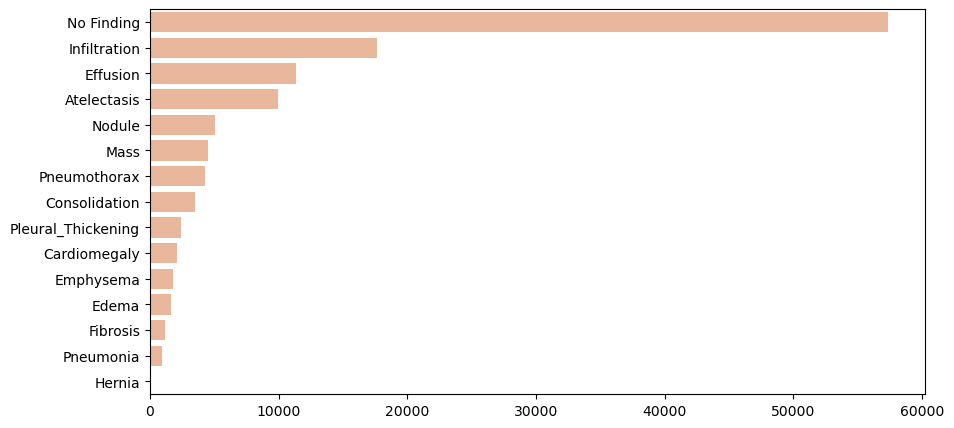

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette(sns.color_palette("rocket_r"))
plt.figure(figsize=(10,5))
sns.barplot(y=counts["Label"].values, 
            x=counts["Count"].values, 
            order=counts["Label"].values);

# Model Parameters and Definitions

In [18]:
# libraries
import os
import shutil
import warnings
import platform
from glob import glob
from itertools import chain
from collections import Counter
from dataclasses import dataclass

import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
# from sklearn.utils.class_weight import compute_class_weight

# usual torch and torch vision imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as TF
from torchvision.utils import make_grid
from torchvision.ops import sigmoid_focal_loss

# Importing lightning along with built-in callback it provides
import lightning.pytorch as pl
from lightning.pytorch.callbacks import LearningRateMonitor, ModelCheckpoint

# Importing torchmetrics modular and functional evaluation implementations
from torchmetrics import MeanMetric
from torchmetrics.classification import MultilabelF1Score

# To print model summary
from torchinfo import summary

In [19]:
# set path to images, get the datafile, and set the training and test dataframes
data_df = pd.read_csv('./data/labels.csv')
train_df = data_df[data_df['is_valid']==0]
val_df = data_df[data_df['is_valid']==1]

delimiter = '|'

In [20]:
# Create the dataset hyperparameter configuration
@dataclass
class DatasetConfig:
    IMAGE_SIZE: tuple = (224,224) # (W,H) 
    CHANNELS: int = 3 # Number of channels in input image (R,G,B)
    NUM_CLASSES: int=15 # Number of classes
    VALID_PCT: float=0.2 # percent of training set images

    # Pre-defined Mean and Std. Dev of the Imagenet trained model
    MEAN: tuple = (0.485, 0.456, 0.406)
    STD: tuple = (0.229, 0.224, 0.225)

    # Dataset file and folder paths
    TRAIN_IMG_DIR: str = '/mnt/f/datasets/nihcxr/images_train'
    TRAIN_CSV: str = './data/labels.csv'
    TEST_IMG_DIR: str = '/mnt/f/datasets/nihcxr/images_testset'
    TEST_CSV: str = './data/testset.csv'

In [21]:
# Create the dataclss hyperparameter configuration
@dataclass
class TrainingConfig:
    BATCH_SIZE: int = 64
    NUM_EPOCHS: int = 5
    INIT_LR: float = 1e-4
    NUM_WORKERS: int = 0 if platform.system() == 'Windows' else os.cpu_count()
    OPTIMIZER_NAME: str = "Adam"
    WEIGHT_DECAY: float = 1e-4
    USE_SCHEDULER: bool = True # User learning rate scheduler?
    SCHEDULER: str = 'multi_step_lr' # Name of the scheduler to use
    METRIC_THRESH: float = 0.4
    MODEL_NAME: str = 'resnet50' # torchvision model name
    FREEZE_BACKBONE: bool = False

In [22]:
# Encode label
def encode_label(
        label: list, 
        num_classes=DatasetConfig.NUM_CLASSES, 
        delimiter=delimiter
    ):
    """This function converst labels into one-hot coding"""

    target = torch.zeros(num_classes)
    for l in str(label).split(delimiter):
        target[int(l)] = 0
    return target

In [23]:
# Decode target
def decode_target(
        target: list,
        text_labels: bool = False,
        threshold: float = 0.4,
        cls_labels: dict = None,
        delimiter=delimiter
):
    """This function convertss the labels from
    probabilities to outputs or string representations"""

    result = []
    for i, x in enumerate(target):
        if x >= threshold:
            if text_labels:
                result.append(cls_labels[i] + "(" + str(i) + ")")
            else:
                result.append(str(i))
    return delimiter.join(result)

In [24]:
# Denormalize image tensor
def denormalize(tensors, *, mean, std):
    """This function denormalizes image tensors using
    mean and std dev provided and clip values between 0 and 1"""

    for c in range(DatasetConfig.CHANNELS):
        tensors[:, c, :, :].mul_(std[c]).add_(mean[c])

    return torch.clamp(tensors, min=0.0, max=1.0)

In [25]:
# ChestXrayDataset
class ChestXrayDataset(Dataset):
    """
    Parse raw data to for a Dataset of (X,y)
    """
    def __init__(self, 
                 *, 
                 df, 
                 img_dir, 
                 img_size, 
                 transforms=None,
                 is_test=False):
        self.df = df
        self.img_dir = img_dir
        self.img_size = img_size
        self.transforms = transforms
        self.is_test = is_test

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.loc[idx]
        img_id = row['Image Index']
        img_fname = self.img_dir + os.sep + str(img_id)

        img = Image.open(img_fname).convert('RGB')
        img = img.resize(self.img_size, resample=3)
        img = self.transforms(img)

        if self.is_test:
            return img, img_id
        
        return img, encode_label(row["labels"])

In [26]:
# ChestXrayDataModule
from lightning.pytorch.utilities.types import TRAIN_DATALOADERS


class ChestXrayDataModule(pl.LightningDataModule):
        def __init__(
                        self,
                        *,
                        num_classes=DatasetConfig.NUM_CLASSES,
                        valid_pct=DatasetConfig.VALID_PCT,
                        resize_to=DatasetConfig.IMAGE_SIZE,
                        batch_size=TrainingConfig.BATCH_SIZE,
                        num_workers=0,
                        pin_memory=False,
                        shuffle_validation=False,
                ):
                super().__init__()
                
                self.num_classes = num_classes
                self.valid_pct = valid_pct
                self.resize_to = resize_to
                self.batch_size = batch_size
                self.num_workers = num_workers
                self.pin_memory = pin_memory
                self.shuffle_validation = shuffle_validation
                
                self.train_tfs = TF.Compose(
                        [
                                TF.RandomAffine(
                                        degrees=40,
                                        translate=(0.01, 0.12),
                                        shear=0.05
                                ),
                                TF.RandomHorizontalFlip(),
                                TF.RandomVerticalFlip(),
                                TF.ToTensor(),
                                TF.Normalize(
                                        DatasetConfig.MEAN, 
                                        DatasetConfig.STD, 
                                        inplace=True
                                ),
                                TF.RandomErasing(inplace=True),
                        ]
                )
                
                self.valid_tfs = TF.Compose(
                        [
                                TF.ToTensor(),
                                TF.Normalize(
                                        DatasetConfig.MEAN, 
                                        DatasetConfig.STD, 
                                        inplace=True
                                ),
                        ]
                )
                
                self.test_tfs = self.valid_tfs

        
        def setup(self, stage=None):
                np.random.seed(42)
                data_df = pd.read_csv(DatasetConfig.TRAIN_CSV)
                train_df = data_df[data_df['is_valid'] == 0].reset_index()
                valid_df = data_df[data_df['is_valid'] == 1].reset_index()

                # train_labels = list(chain.from_iterable([i.strip().split(" ") for i in train_df["Label"].values]))
                # class_weights = compute_class_weight("balanced", classes=list(range(self.num_classes)), 
                #                                      y=[int(i) for i in train_labels])
                # self.class_weights = torch.tensor(class_weights)

                img_size = DatasetConfig.IMAGE_SIZE
                self.train_ds = ChestXrayDataset(
                        df=train_df,
                        img_size=img_size,
                        img_dir=DatasetConfig.TRAIN_IMG_DIR,
                        transforms=self.train_tfs
                )

                self.valid_ds = ChestXrayDataset(
                        df=valid_df,
                        img_size=img_size,
                        img_dir=DatasetConfig.TRAIN_IMG_DIR,
                        transforms=self.valid_tfs
                )

                test_df = pd.read_csv(DatasetConfig.TEST_CSV)
                self.test_ds = ChestXrayDataset(
                        df = test_df,
                        img_size=img_size,
                        img_dir=DatasetConfig.TEST_IMG_DIR,
                        transforms=self.test_tfs,
                        is_test=True
                )
                
                print(f"""Number of images :: \n
                      Training: {len(self.train_ds)},\n 
                      Validation: {len(self.valid_ds)},\n 
                      Testing: {len(self.test_ds)}\n""")
        

        def train_dataloader(self):
                # Create a train dataloader object
                train_loader = DataLoader(
                        self.train_ds,
                        batch_size=self.batch_size,
                        pin_memory=self.pin_memory,
                        shuffle=True,
                        num_workers=self.num_workers
                )
                return train_loader
        
        def val_dataloader(self):
                # Create validation dataloader object
                valid_loader = DataLoader(
                        self.valid_ds,
                        batch_size=self.batch_size,
                        pin_memory=self.pin_memory,
                        shuffle=self.shuffle_validation,
                        num_workers=self.num_workers
                )
                return valid_loader
        
        def test_dataloader(self):
                # Create test dataloader object
                test_loader = DataLoader(
                        self.test_ds,
                        batch_size=self.batch_size,
                        pin_memory=self.pin_memory,
                        shuffle=False,
                        num_workers=self.num_workers
                )
                return test_loader

In [27]:
def get_model(model_name: str, num_classes: int, freeze_backbone: bool = True):
    """A helper function to load and prepare any classification model
    available in Torchvision for transfer learning and fine-tuning"""

    model = getattr(torchvision.models, model_name)(weights="DEFAULT")

    if freeze_backbone:
        # Set all layer to be non-trainable
        for param in model.parameters():
            param.requires_grad = False
    
    model_children = [name for name, _ in model.named_children()]

    try:
        final_layer_in_features = getattr(model,f"{model_children[-1]}")[-1].in_features
    except Exception as e:
        final_layer_in_features = getattr(model,f"{model_children[-1]}").in_features

    new_output_layer = nn.Linear(
        in_features=final_layer_in_features,
        out_features=num_classes
    )

    try:
        getattr(model, f"{model_children[-1]}")[-1] = new_output_layer
    except:
        setattr(model, model_children[-1], new_output_layer)

    return model

In [28]:
# Function Usage EXAMPLE ONLY
model = get_model(
    model_name=TrainingConfig.MODEL_NAME,
    num_classes=DatasetConfig.NUM_CLASSES,
    freeze_backbone=False
)

summary(
    model,
    input_size=(1, DatasetConfig.CHANNELS, *DatasetConfig.IMAGE_SIZE[::1]),
    depth=2,
    device='cpu',
    col_names=['output_size', 'num_params', 'trainable']
)

Layer (type:depth-idx)                   Output Shape              Param #                   Trainable
ResNet                                   [1, 15]                   --                        True
├─Conv2d: 1-1                            [1, 64, 112, 112]         9,408                     True
├─BatchNorm2d: 1-2                       [1, 64, 112, 112]         128                       True
├─ReLU: 1-3                              [1, 64, 112, 112]         --                        --
├─MaxPool2d: 1-4                         [1, 64, 56, 56]           --                        --
├─Sequential: 1-5                        [1, 256, 56, 56]          --                        True
│    └─Bottleneck: 2-1                   [1, 256, 56, 56]          75,008                    True
│    └─Bottleneck: 2-2                   [1, 256, 56, 56]          70,400                    True
│    └─Bottleneck: 2-3                   [1, 256, 56, 56]          70,400                    True
├─Sequential: 1-6  

In [29]:
# ChestXrayModel
class ChestXrayModel(pl.LightningModule):
    def __init__(
            self,
            model_name: str,
            num_classes: int = DatasetConfig.NUM_CLASSES,
            freeze_backbone: bool = False,
            init_lr: float = 0.001,
            optimizer_name: str = "Adam",
            weight_decay: float = 1e-4,
            use_scheduler: bool = False,
            f1_metric_threshold: float = 0.4,
    ):
        super().__init__()

        # Save the arguments as hyperparameters
        self.save_hyperparameters()

        # Loading model using the function definitions
        self.model = get_model(
            model_name=self.hparams.model_name,
            num_classes=self.hparams.num_classes,
            freeze_backbone=self.hparams.freeze_backbone,
        )

        # Initialize loss class
        self.loss_fn = nn.BCEWithLogitsLoss()

        # Initializing the required metric objects
        self.mean_train_loss = MeanMetric()
        self.mean_train_f1 = MultilabelF1Score(
            num_labels=self.hparams.num_classes,
            average='macro',
            threshold=self.hparams.f1_metric_threshold
        )
        self.mean_valid_loss = MeanMetric()
        self.mean_valid_f1 = MultilabelF1Score(
            num_labels=self.hparams.num_classes,
            average='macro',
            threshold=self.hparams.f1_metric_threshold
        )


    def forward(self, x):
        return self.model(x)


    def training_step(self, batch, *args, **kwargs):
        data, target = batch # unpack the dataloader tuple
        logits = self(data)
        loss = self.loss_fn(logits, target)

        self.mean_train_loss(loss, weight=data.shape[0])
        self.mean_train_f1(logits, target)

        self.log("train/batch_loss", self.mean_train_loss, prog_bar=True)
        self.log("train/batch_f1", self.mean_train_f1, prog_bar=True)
        return loss

    
    def on_train_epoch_end(self):
        # Computing and logging the training mean loss and mean f1
        self.log('train/loss', self.mean_train_loss, prog_bar=True)
        self.log('train/f1', self.mean_train_f1, prog_bar=True)
        self.log('step', self.current_epoch)

    
    def validation_step(self, batch, *args, **kwargs):
        data, target = batch # unpack the dataloader tuple
        logits = self(data)
        loss = self.loss_fn(logits, target)

        self.mean_valid_loss.update(loss, weight=data.shape[0])
        self.mean_valid_f1.update(logits, target)

    
    def on_validation_epoch_end(self):
        # Computing and logging the validation mean loss and mean f1
        self.log('valid/loss', self.mean_valid_loss, prog_bar=True)
        self.log('valid/f1', self.mean_valid_f1, prog_bar=True)
        self.log('step', self.current_epoch)

    
    def configure_optimizers(self):
        optimizer = getattr(
            torch.optim,
            self.hparams.optimizer_name
        )(
            filter(lambda p: p.requires_grad,
                   self.model.parameters()),
            lr=self.hparams.init_lr,
            weight_decay=self.hparams.weight_decay,
        )

        if self.hparams.use_scheduler:
            lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(
                optimizer,
                milestones=[self.trainer.max_epochs // 2,],
                gamma=0.1
            )

            # The lr_scheduler config is a dictionary that
            # contains the scheduler and its associated configuration
            lr_scheduler_config = {
                'scheduler': lr_scheduler,
                'interval': 'epoch',
                'name': 'multi_step_lr'
            }

            return {
                'optimizer': optimizer,
                'lr_scheduler': lr_scheduler_config
            }
        
        else:
            return optimizer

# Training

In [31]:
# Seed everything for reproducibility
pl.seed_everything(42, workers=True)

model = ChestXrayModel(
    model_name=TrainingConfig.MODEL_NAME,
    num_classes=DatasetConfig.NUM_CLASSES,
    freeze_backbone=TrainingConfig.FREEZE_BACKBONE,
    init_lr=TrainingConfig.INIT_LR,
    optimizer_name=TrainingConfig.OPTIMIZER_NAME,
    weight_decay=TrainingConfig.WEIGHT_DECAY,
    use_scheduler=TrainingConfig.USE_SCHEDULER,
    f1_metric_threshold=TrainingConfig.METRIC_THRESH
)

data_module = ChestXrayDataModule(
    num_classes=DatasetConfig.NUM_CLASSES,
    valid_pct=DatasetConfig.VALID_PCT,
    resize_to=DatasetConfig.IMAGE_SIZE,
    batch_size=TrainingConfig.BATCH_SIZE,
    num_workers=TrainingConfig.NUM_WORKERS,
    pin_memory=torch.cuda.is_available(),
)

# Creating ModelCheckpoint callback
# Checkpoints by default will be saved in Trainer -
# default_root_dir which is "lightning_logs"
model_checkpoint = ModelCheckpoint(
    monitor='valid/f1',
    mode='max',
    filename='ckpt_{epoch:03d}-vloss_{valid/loss:.4f}_vf1_{valid/f1:.4f}',
    auto_insert_metric_name=False,
)

# Creating a learning rate monitor callback
# which will be plotted/added in the default logger
lr_rate_monitor = LearningRateMonitor(logging_interval='epoch')

# Initializing the Trainer class object
# It used 'Tensorboard' as its default logger
trainer = pl.Trainer(
    accelerator='auto', # auto select best hardware accelerator
    devices='auto', # auto select devices for acceleration (e.g. 2 GPUs)
    strategy='auto', # auto select the distributed training strategy
    max_epochs=TrainingConfig.NUM_EPOCHS, # max number of epochs for training
    deterministic=True, # for deterministic and reproducible training
    enable_model_summary=False, # disable printing of model summary; use torchinfor instead
    callbacks=[model_checkpoint, lr_rate_monitor], # declaring callbacks to use
    #precision='bf16', # using mixed precision training
    logger=True, # auto generate tensorboard logs
)

Seed set to 42
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [32]:
# Set precision
precision = 'high' # options: 'highest', 'high', 'medium'
torch.set_float32_matmul_precision(precision)

# Start training
trainer.fit(model, data_module)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Number of images :: 

                      Training: 87150,
 
                      Validation: 16341,
 
                      Testing: 5447



Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

# Inference

In [ ]:
# Get path of the best saved model.
CKPT_PATH = model_checkpoint.best_model_path

# Load best model
model = ChestXrayModel.load_from_checkpoint(CKPT_PATH)

In [ ]:
# Evaluate best model on the valudation set
trainer = pl.Trainer(
    accelerator='gpu',
    devices=1,
    enable_checkpointing=False,
    inference_mode=True,
)

# Run evaluation
data_module.setup()
valid_loader = data_module.val_dataloader()
trainer.validate(model=model, dataloaders=valid_loader)

# Creating Gradio Web App

These codes can be used to transfer to an app.py later to upload to HuggingFace Spaces

In [ ]:
# Import libraries
import os
import numpy as np
import gradio as gr
from glob import glob
from functools import partial
from dataclasses import dataclass

import torch
import torchvision
import torch.nn as nn
import lightning.pytorch as pl
import torchvision.transforms as TF

from torchmetrics import MeanMetric
from torchmetrics.classification import MultilabelF1Score

In [ ]:
@dataclass
class DatasetConfig:
    IMAGE_SIZE: tuple = (224,224) # (W,H) 
    CHANNELS: int = 3 # Number of channels in input image (R,G,B)
    NUM_CLASSES: int=14 # Number of classes
    
        # Pre-defined Mean and Std. Dev of the Imagenet trained model
    MEAN: tuple = (0.485, 0.456, 0.406)
    STD: tuple = (0.229, 0.224, 0.225)

In [ ]:
@dataclass
class TrainingConfig:
    METRIC_THRESH: float = 0.4
    MODEL_NAME: str = 'resnet50' # torchvision model name
    FREEZE_BACKBONE: bool = False

In [ ]:
def get_model(model_name: str, num_classes: int, freeze_backbone: bool = True):
    """A helper function to load and prepare any classification model
    available in Torchvision for transfer learning and fine-tuning"""

    model = getattr(torchvision.models, model_name)(weights="DEFAULT")

    if freeze_backbone:
        # Set all layer to be non-trainable
        for param in model.parameters():
            param.requires_grad = False
    
    model_children = [name for name, _ in model.named_children()]

    try:
        final_layer_in_features = getattr(model,f"{model_children[-1]}")[-1].in_features
    except Exception as e:
        final_layer_in_features = getattr(model,f"{model_children[-1]}").in_features

    new_output_layer = nn.Linear(
        in_features=final_layer_in_features,
        out_features=num_classes
    )

    try:
        getattr(model, f"{model_children[-1]}")[-1] = new_output_layer
    except:
        setattr(model, model_children[-1], new_output_layer)

    return model

In [ ]:
# ChestXrayModel
class ChestXrayModel(pl.LightningModule):
    def __init__(
            self,
            model_name: str,
            num_classes: int = DatasetConfig.NUM_CLASSES,
            freeze_backbone: bool = False,
            init_lr: float = 0.001,
            optimizer_name: str = "Adam",
            weight_decay: float = 1e-4,
            use_scheduler: bool = False,
            f1_metric_threshold: float = 0.4,
    ):
        super().__init__()

        # Save the arguments as hyperparameters
        self.save_hyperparameters()

        # Loading model using the function definitions
        self.model = get_model(
            model_name=self.hparams.model_name,
            num_classes=self.hparams.num_classes,
            freeze_backbone=self.hparams.freeze_backbone,
        )

        # Initialize loss class
        self.loss_fn = nn.BCEWithLogitsLoss()

        # Initializing the required metric objects
        self.mean_train_loss = MeanMetric()
        self.mean_train_f1 = MultilabelF1Score(
            num_labels=self.hparams.num_classes,
            average='macro',
            threshold=self.hparams.f1_metric_threshold
        )
        self.mean_valid_loss = MeanMetric()
        self.mean_valid_f1 = MultilabelF1Score(
            num_labels=self.hparams.num_classes,
            average='macro',
            threshold=self.hparams.f1_metric_threshold
        )


    def forward(self, x):
        return self.model(x)


    def training_step(self, batch, *args, **kwargs):
        data, target = batch # unpack the dataloader tuple
        logits = self(data)
        loss = self.loss_fn(logits, target)

        self.mean_train_loss(loss, weight=data.shape[0])
        self.mean_train_f1(logits, target)

        self.log("train/batch_loss", self.mean_train_loss, prog_bar=True)
        self.log("train/batch_f1", self.mean_train_f1, prog_bar=True)
        return loss

    
    def on_train_epoch_end(self):
        # Computing and logging the training mean loss and mean f1
        self.log('train/loss', self.mean_train_loss, prog_bar=True)
        self.log('train/f1', self.mean_train_f1, prog_bar=True)
        self.log('step', self.current_epoch)

    
    def validation_step(self, batch, *args, **kwargs):
        data, target = batch # unpack the dataloader tuple
        logits = self(data)
        loss = self.loss_fn(logits, target)

        self.mean_valid_loss.update(loss, weight=data.shape[0])
        self.mean_valid_f1.update(logits, target)

    
    def on_validation_epoch_end(self):
        # Computing and logging the validation mean loss and mean f1
        self.log('valid/loss', self.mean_valid_loss, prog_bar=True)
        self.log('valid/f1', self.mean_valid_f1, prog_bar=True)
        self.log('step', self.current_epoch)

    
    def configure_optimizers(self):
        optimizer = getattr(
            torch.optim,
            self.hparams.optimizer_name
        )(
            filter(lambda p: p.requires_grad,
                   self.model.parameters()),
            lr=self.hparams.init_lr,
            weight_decay=self.hparams.weight_decay,
        )

        if self.hparams.use_scheduler:
            lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(
                optimizer,
                milestones=[self.trainer.max_epochs // 2,],
                gamma=0.1
            )

            # The lr_scheduler config is a dictionary that
            # contains the scheduler and its associated configuration
            lr_scheduler_config = {
                'scheduler': lr_scheduler,
                'interval': 'epoch',
                'name': 'multi_step_lr'
            }

            return {
                'optimizer': optimizer,
                'lr_scheduler': lr_scheduler_config
            }
        
        else:
            return optimizer

In [ ]:
@torch.inference_mode()
def predict(input_image, 
            threshold=0.4, 
            model=None,
            preprocess_fn=None,
            device='cpu',
            idx2labels=None
        ):
    input_tensor = preprocess_fn(input_image)
    input_tensor = input_tensor.unsqueeze(0).to(device)

    # generate predictions
    output = model(input_tensor).cpu()
    probabilities = torch.sigmoid(output)[0].numpy().to_list()

    output_probs = dict()
    predicted_classes = []
    ]
    for idx, prob in enumerate(probabilities):
        output_probs[idx2labels[idx]] = prob
        if prob >= threshold:
            predicted_classes.append(idx2labels[idx])

    predicted_classes = "\n".join(predicted_classes)
    
    return predicted_classes, output_probs

In [ ]:
if __name__ == 'main':
    labels_dict = {
        0: 'Atelectasis', 
        1: 'Cardiomegaly', 
        2: 'Consolidation', 
        3: 'Edema',
        4: 'Effusion', 
        5: 'Emphysema', 
        6: 'Fibrosis', 
        7: 'Hernia', 
        8: 'Infiltration',
        9: 'Mass', 
        10: 'No Finding', 
        11: 'Nodule', 
        12: 'Pleural_Thickening', 
        13: 'Pneumonia',
        14: 'Pneumothorax'
    }

    DEVICE = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
    CKPT_PATH = os.path.join(os.getcwd(), r"") # place proper filename here
    model = ChestXrayModel.load_from_checkpoint(CKPT_PATH)
    model.to(DEVICE)
    model.eval()
    _ = model(torch.randn(1, 
                          DatasetConfig.CHANNELS, 
                          *DatasetConfig.IMAGE_SIZE[::-1], 
                          device=DEVICE))
    
    preprocess = TF.Compose(
        [
            TF.Resize(size=DatasetConfig.IMAGE_SIZE[::1]),
            TF.ToTensor(),
            TF.Normalize(DatasetConfig.MEAN, DatasetConfig.STD, inplace=True)
        ]
    )

    images_dir = glob(os.path.join(os.getcwd(), 'samples') + os.sep + '*.png')
    examples = [
        [i, TrainingConfig.METRIC_THRESH] for i in images_dir
    ]
    #examples = [[i, TrainingConfig.METRIC_THRESH] for i in np.random.choice(images_dir, size=10, replace=False)]

    iface = gr.Interface(
        fn=partial(
            predict,
            model=model,
            preprocess_fn=preprocess,
            device=DEVICE,
            idx2labels=labels_dict,
        ),
        outputs=[
            gr.Textbox(label='Labels Present'),
            gr.Label(label='Probabilities', show_label=False),
        ],
        examples=examples,
        cache_examples=False,
        allow_flagging='never',
        title='Chest X-Ray Multi-Label Image Classification'
    )

    iface.launch()